In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
import numpy as np

Plot DALYs, Prev, Indec by age group for 2021


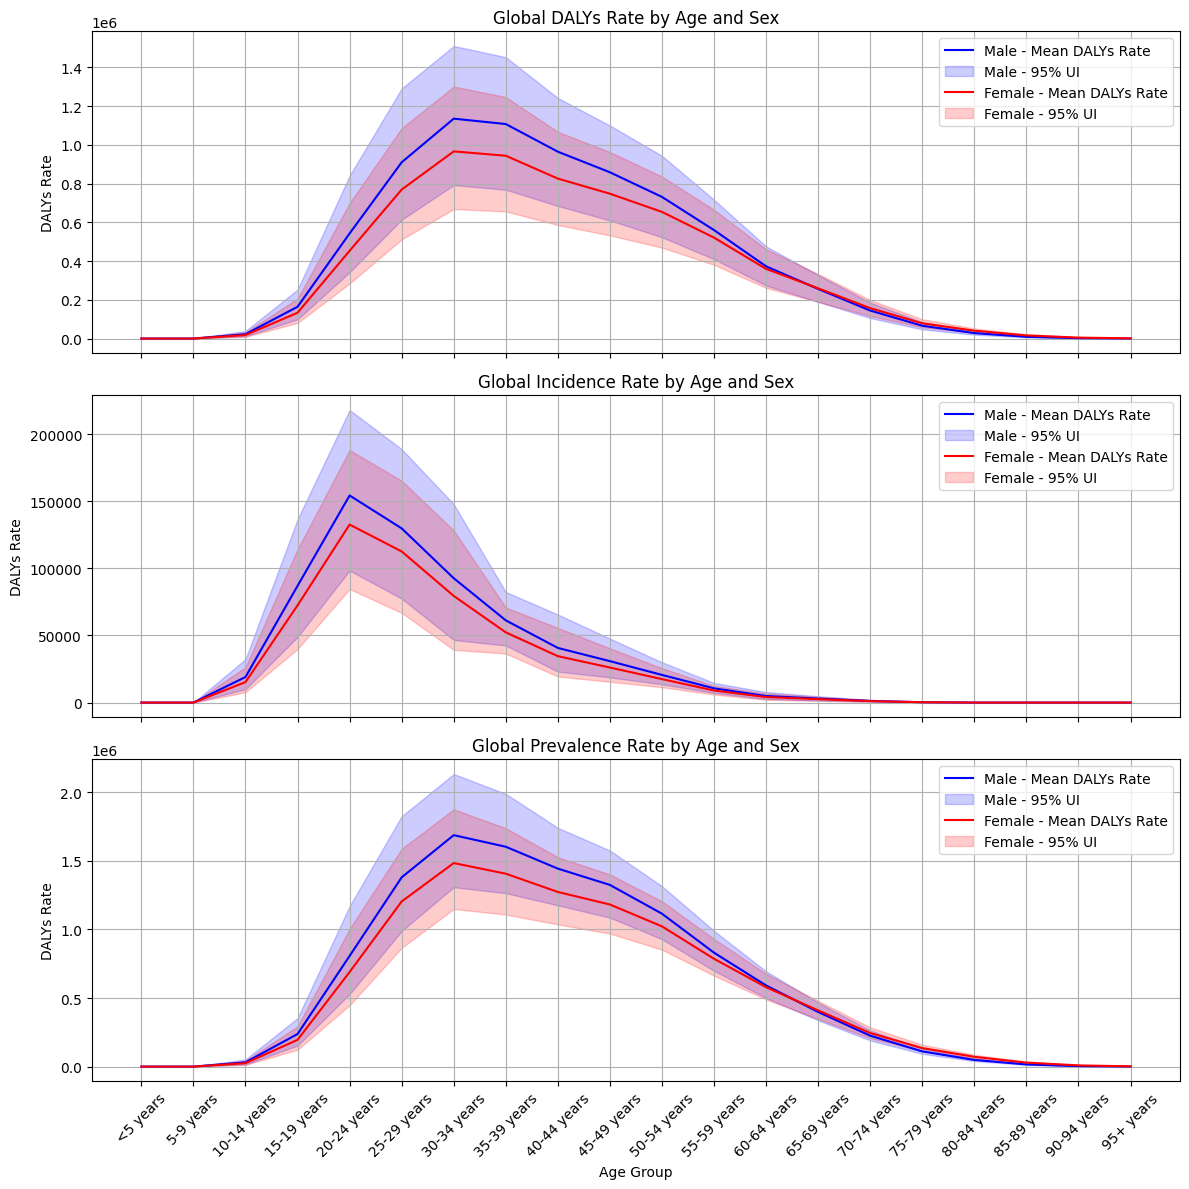

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the three datasets
file_paths = [
    'new_data_important/DALYs/DALYs_countries_2021.csv',
    'new_data_important/Incidence/Incidence_countries_2020.csv',
    'new_data_important/Prevalence/Prevalence_countries_2019.csv'
]
file_names = ["DALYs", "Incidence", "Prevalence"]

# Create a figure with 3 stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Loop through each file and plot on a separate axis
for i, file_path in enumerate(file_paths):
    # Load the data
    df = pd.read_csv(file_path)
    df = df[df['age_id'] != 22]  # Filter out rows where age_id equals 22
    df = df.sort_values(by='age_id', ascending=True)  # Sort by age_id
    global_dalys = df[df['location_name'] == 'Global']  # Filter for global data

    # Separate data by sex
    male_data = global_dalys[global_dalys['sex_id'] == 1]
    female_data = global_dalys[global_dalys['sex_id'] == 2]
    both_data = global_dalys[global_dalys['sex_id'] == 3]

    # Plot on the current axis
    ax = axes[i]
    ax.plot(male_data['age_name'], male_data['val'], label='Male - Mean DALYs Rate', color='blue')
    ax.fill_between(male_data['age_name'], male_data['lower'], male_data['upper'], color='blue', alpha=0.2, label='Male - 95% UI')

    ax.plot(female_data['age_name'], female_data['val'], label='Female - Mean DALYs Rate', color='red')
    ax.fill_between(female_data['age_name'], female_data['lower'], female_data['upper'], color='red', alpha=0.2, label='Female - 95% UI')

    # ax.plot(both_data['age_name'], both_data['val'], label='Both - Mean DALYs Rate', color='green')
    # ax.fill_between(both_data['age_name'], both_data['lower'], both_data['upper'], color='green', alpha=0.2, label='Both - 95% UI')

    # Add title, labels, and legend
    ax.set_title(f'Global {file_names[i]} Rate by Age and Sex')
    ax.set_ylabel('DALYs Rate')
    ax.legend()
    ax.grid(True)

# Add a shared x-axis label
axes[-1].set_xlabel('Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [16]:
file_path = 'new_data_important/data_1990_2021.csv'

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.set_index('year')
    print(sex_data)
    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = 2050 - sex_data.index.max()
    print(forecast_years)
    forecast = model_fit.forecast(steps=forecast_years)

    # Store the forecast
    forecasts[sex_id] = forecast

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed')
    plt.plot(range(sex_data.index.max() + 1, 2051), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'year': range(df['year'].max() + 1, 2051),
    **{f'sex_id_{sex_id}': forecasts[sex_id] for sex_id in forecasts}
})

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv', index=False)
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

         val
year        
1990  187.30
1991  187.36
1992  187.44
1993  187.49
1994  187.56
1996  187.46
1995  187.58
1997  187.37
1998  187.20
1999  187.07
2000  187.04
2001  187.01
2002  187.03
2003  187.12
2004  187.21
2005  187.34
2006  187.61
2007  188.09
2008  188.66
2010  189.37
2011  189.46
2009  189.09
2013  189.60
2012  189.57
2014  189.59
2015  189.56
2016  189.39
2017  189.25
2019  189.16
2018  189.15
2020  189.41
2021  188.96
29


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: Prediction must have `end` after `start`.

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

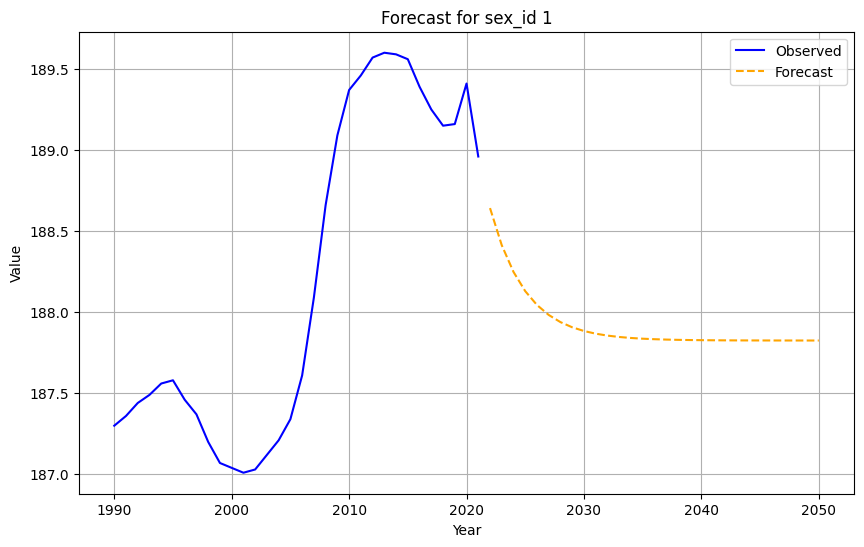

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

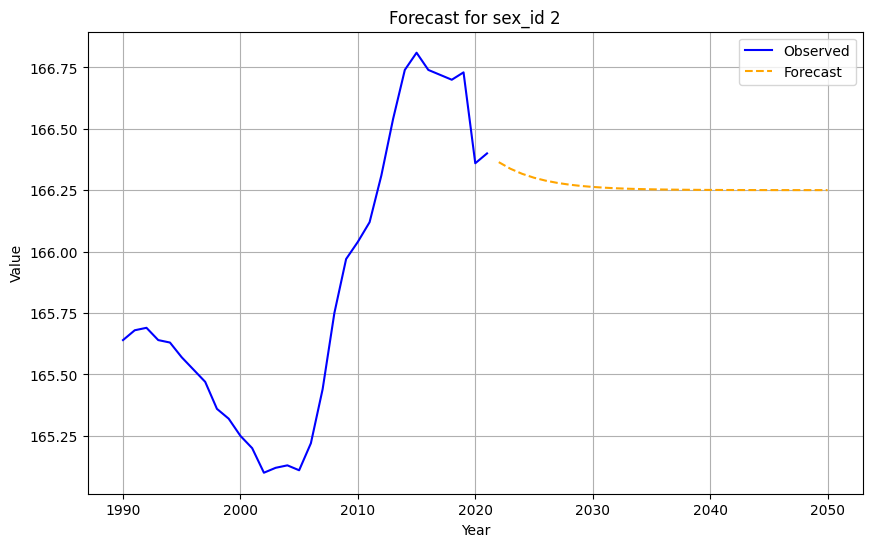

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

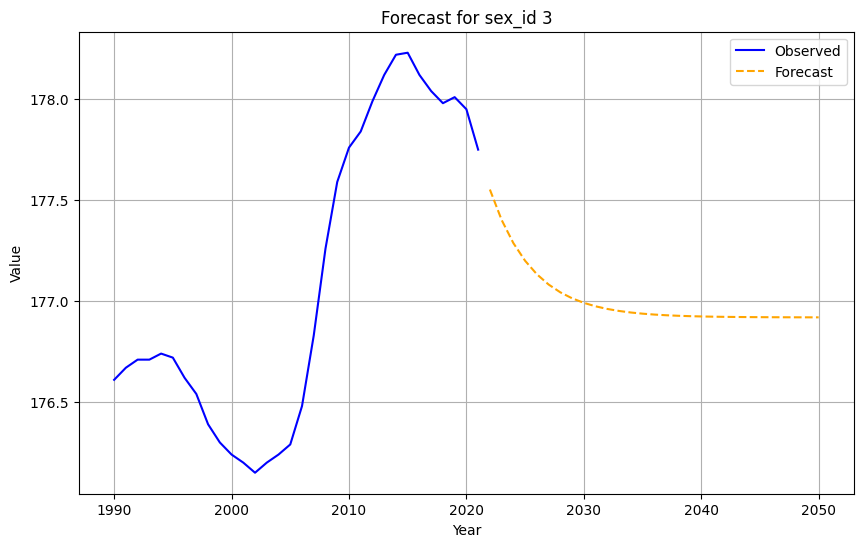

Forecast saved to 'new_data_important/forecast_1990_2050.csv'.


In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')
    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1,1,1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

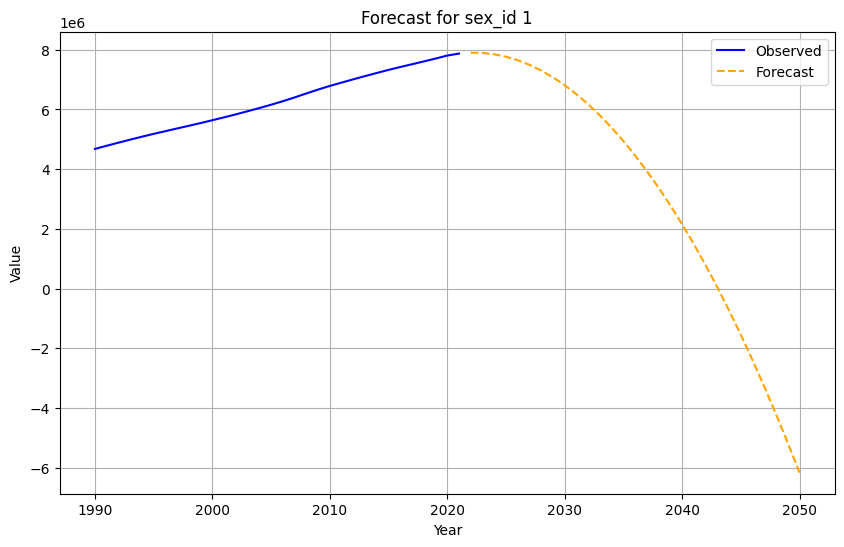

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

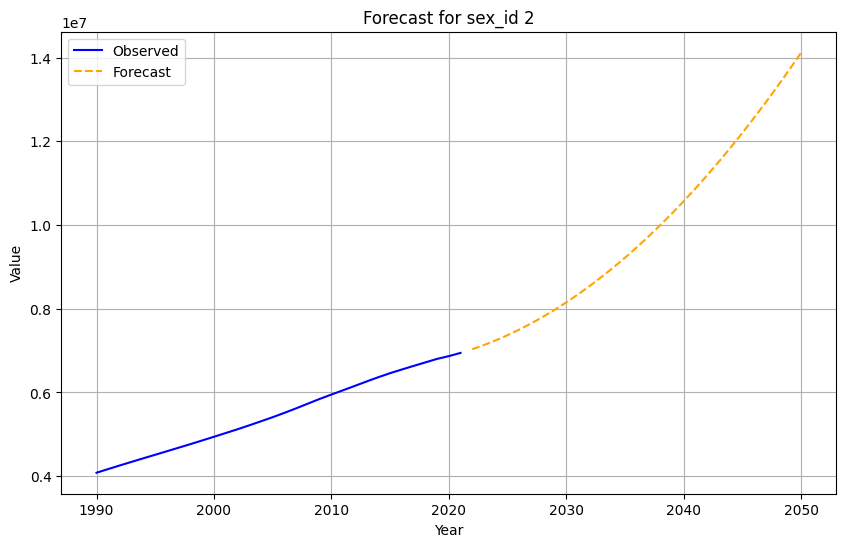

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

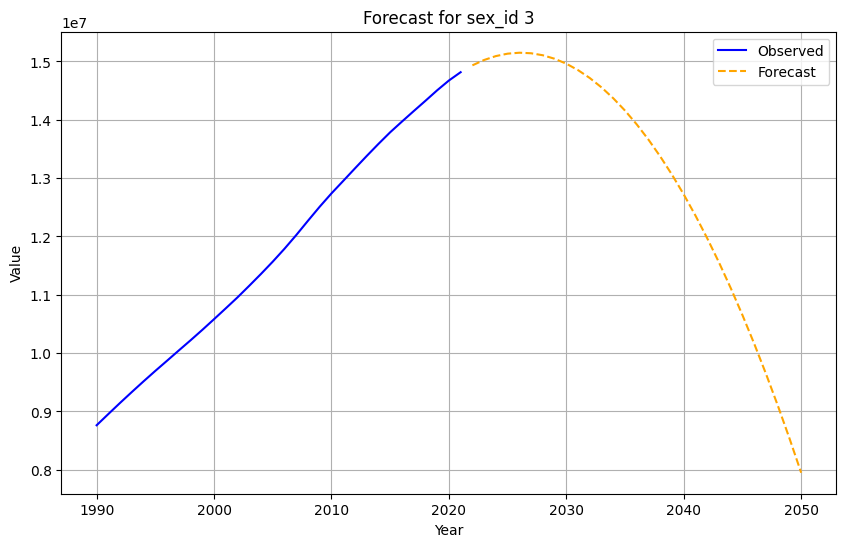

Forecast saved to 'new_data_important/forecast_1990_2050.csv'.


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')
    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(0, 3, 0))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

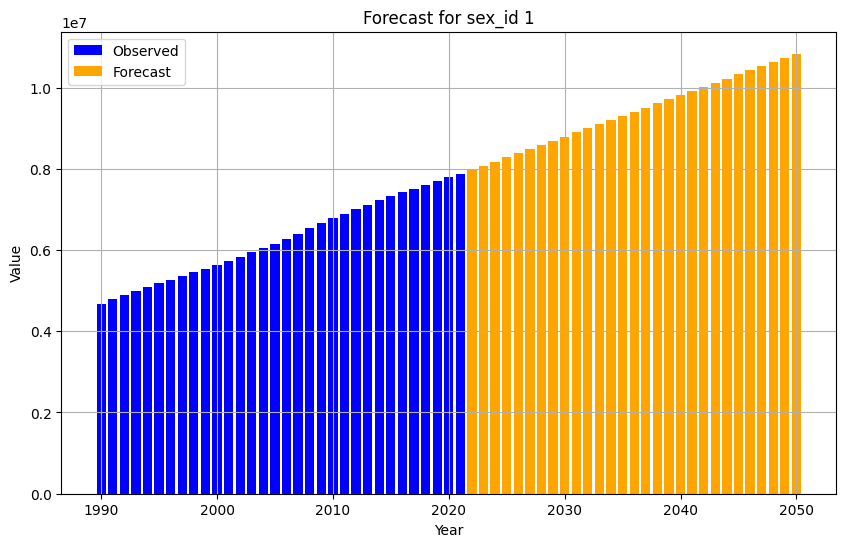

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

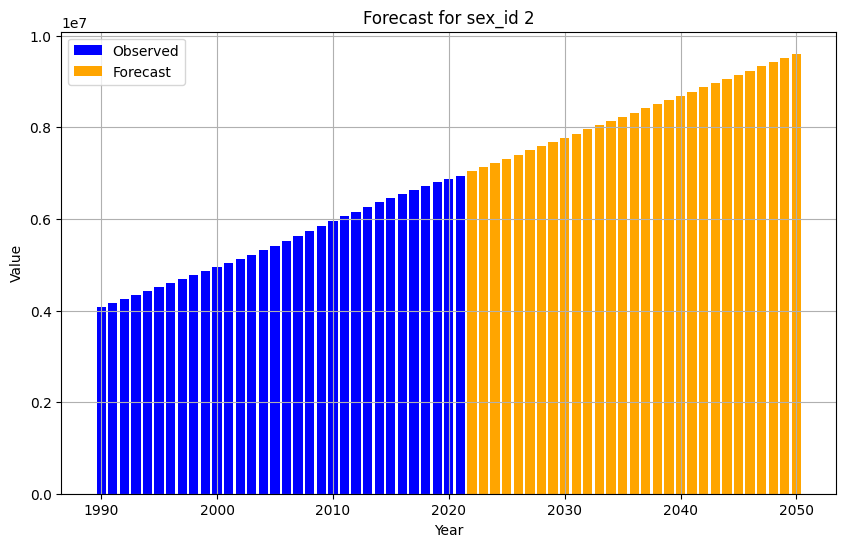

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

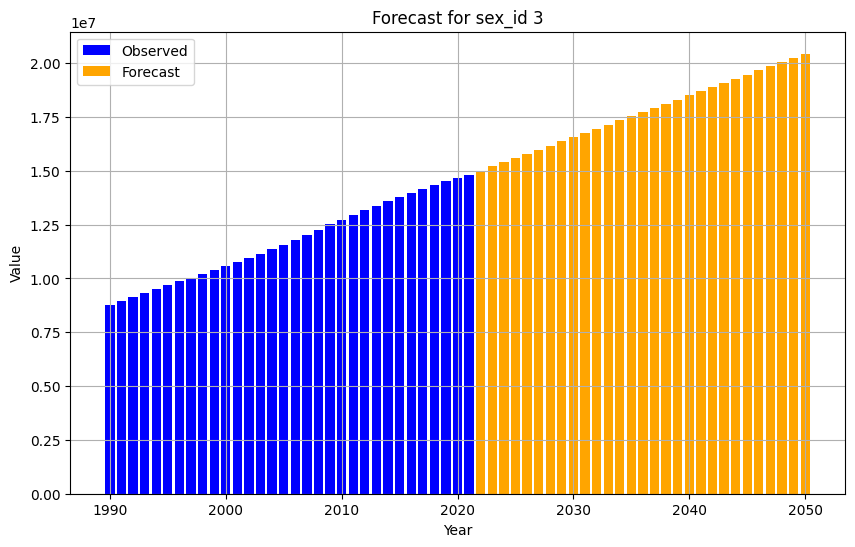

Forecast saved to 'new_data_important/forecast_1990_2050.csv'.


In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')

    sex_data = sex_data.set_index('year')

    # Fit the ARIMA model
    model = ARIMA(sex_data['val'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Convert forecast to a pandas Series with the correct index
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.bar(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.bar(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    #plt.ylim(0, 200)  # Ensure the y-axis starts from 0
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050.csv'.")

AUtomation code for calculation ARIMA order
nhưng đéo đúng cho lắm :>>

ADF Statistic: -1.468485240568554
p-value: 0.5490396759025762
Series is not stationary. Consider differencing.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

Best ARIMA order: (2, 0, 0) with AIC: 687.6942372838619


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


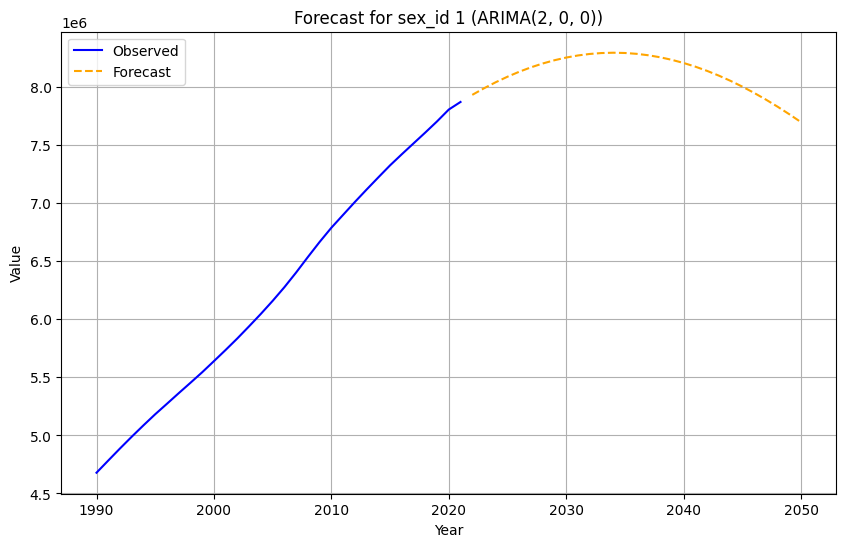

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary. Consider differencing.")
    else:
        print("Series is stationary.")

# Grid search for ARIMA parameters
def optimize_arima(series, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, d, q)
                best_model = model_fit
        except Exception as e:
            continue

    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_model, best_order

# Example for one sex_id
sex_id = 1
sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year').set_index('year')

# Check stationarity
check_stationarity(sex_data['val'])

# Optimize ARIMA parameters
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

best_model, best_order = optimize_arima(sex_data['val'], p_range, d_range, q_range)

# Forecast using the best model
forecast_years = range(sex_data.index.max() + 1, 2051)
forecast = best_model.forecast(steps=len(forecast_years))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
plt.title(f'Forecast for sex_id {sex_id} (ARIMA{best_order})')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

ADF Statistic: -0.01403150890321929
p-value: 0.9573561927216102
Series is not stationary. Differencing is required.
ARIMA(0,0,0) failed: Input contains NaN.
ARIMA(0,0,1) failed: Input contains NaN.
ARIMA(0,0,2) failed: Input contains NaN.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

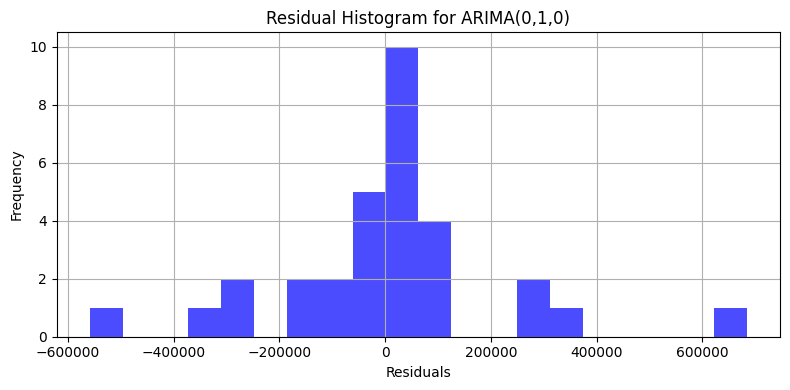

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


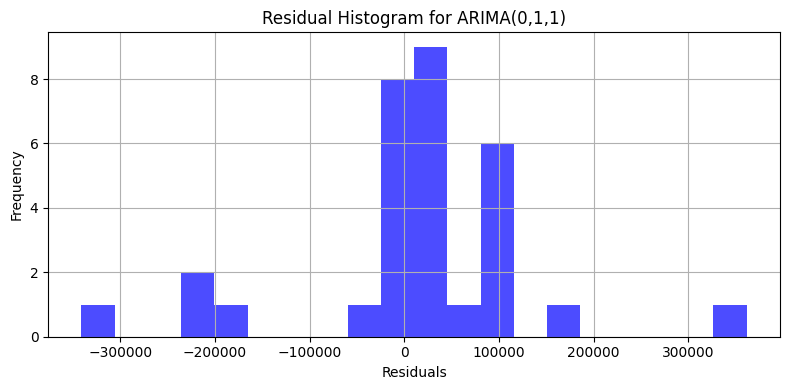

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


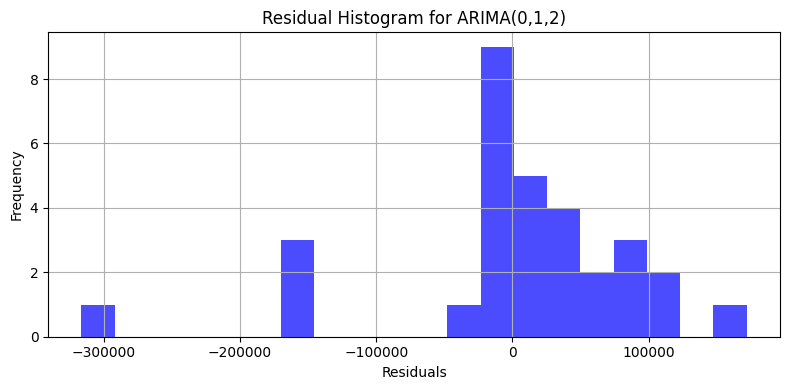

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

ARIMA(1,0,0) failed: Input contains NaN.
ARIMA(1,0,1) failed: Input contains NaN.
ARIMA(1,0,2) failed: Input contains NaN.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


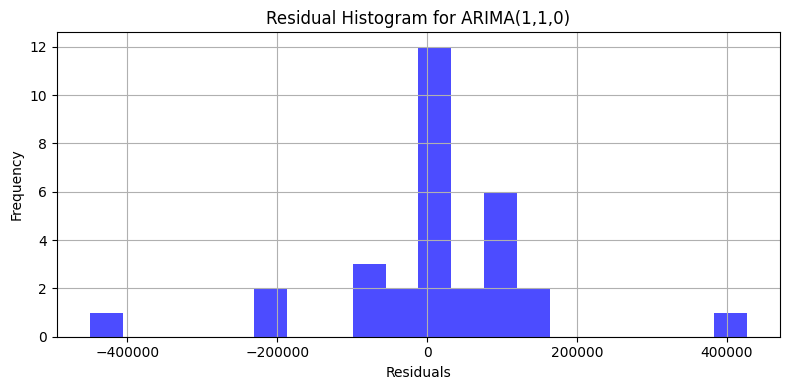

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


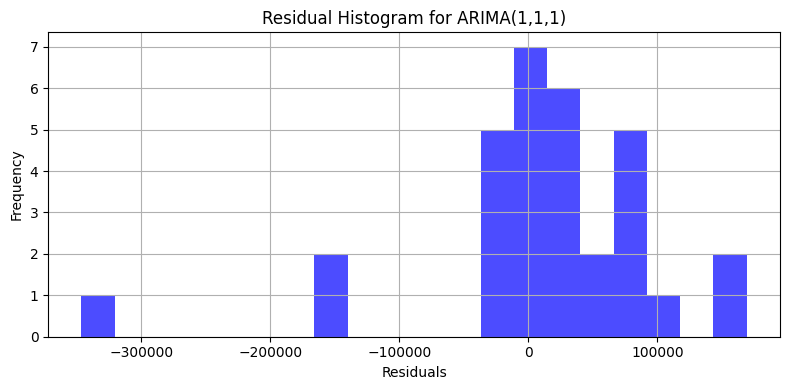

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


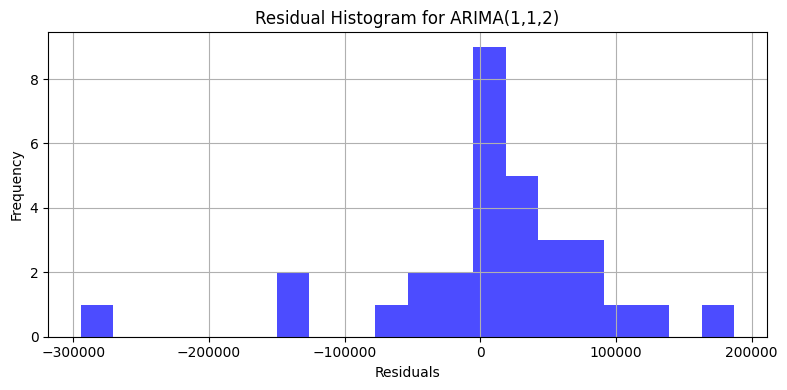

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

ARIMA(2,0,0) failed: Input contains NaN.
ARIMA(2,0,1) failed: Input contains NaN.
ARIMA(2,0,2) failed: Input contains NaN.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


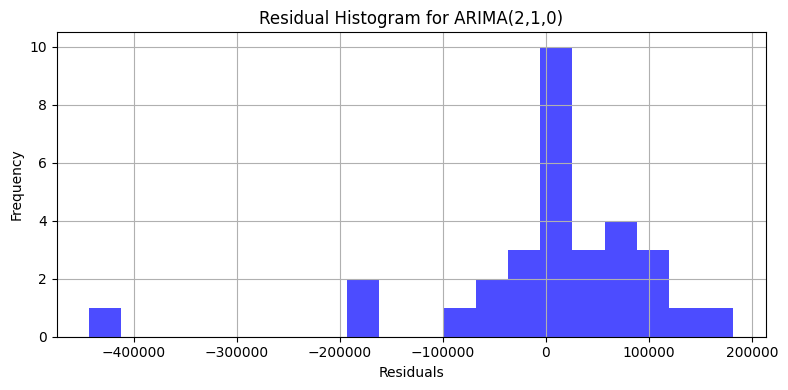

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


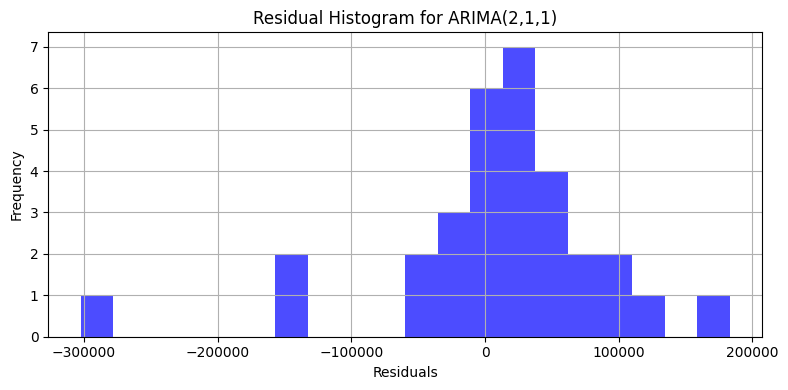

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


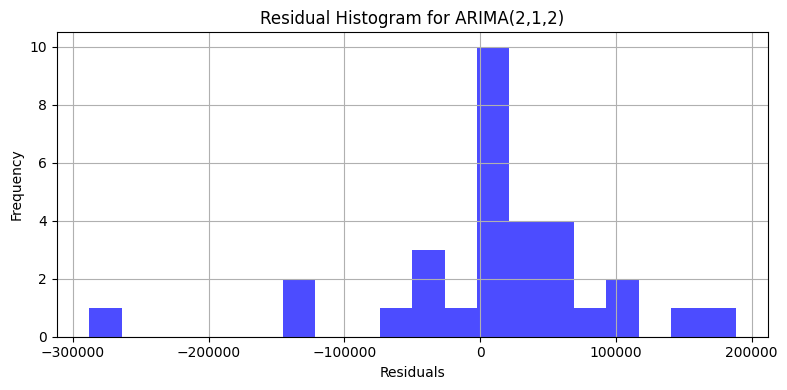

   p  d  q         AIC           RMSE
0  0  1  0  851.494893  155240.622045
1  0  1  1  821.886492   91562.750770
2  0  1  2  808.747534  117022.843263
3  1  1  0  826.731631  121504.604126
4  1  1  1  807.270522  118045.901091
5  1  1  2  806.709034  124148.973661
6  2  1  0  814.694542  125413.066162
7  2  1  1  805.567730  124094.908597
8  2  1  2  806.922947  124193.033510
Results saved to 'arima_results.csv'.


In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Filter data for a specific `sex_id` (example: 1)
sex_id = 1
sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
sex_data = sex_data.set_index('year')

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary. Differencing is required.")
        return False
    else:
        print("Series is stationary.")
        return True

# Perform differencing if necessary
if not check_stationarity(sex_data['val']):
    sex_data['val'] = sex_data['val'].diff().dropna()

# Grid search for ARIMA parameters
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
results = []

for p, d, q in itertools.product(p_range, d_range, q_range):
    try:
        model = ARIMA(sex_data['val'], order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        residuals = model_fit.resid
        rmse = np.sqrt(mean_squared_error(sex_data['val'][d:], residuals[d:]))
        results.append((p, d, q, aic, rmse))

        # Plot residual histogram
        plt.figure(figsize=(8, 4))
        plt.hist(residuals, bins=20, color='blue', alpha=0.7)
        plt.title(f'Residual Histogram for ARIMA({p},{d},{q})')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed: {e}")

# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'RMSE'])
print(results_df)

# Save results to a CSV file
results_df.to_csv('arima_results.csv', index=False)
print("Results saved to 'arima_results.csv'.")

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary. Differencing is required.")
        return False
    else:
        print("Series is stationary.")
        return True

# Function to find the best ARIMA parameters
def find_best_arima(series, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    best_model = None
    results = []

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            results.append((p, d, q, aic))
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_model = model_fit
        except Exception as e:
            continue

    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_model, best_order, results_df

# Example usage
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Filter data for a specific `sex_id` (example: 1)
sex_id = 1
sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
sex_data = sex_data.set_index('year')

# Check stationarity and apply differencing if needed
if not check_stationarity(sex_data['val']):
    sex_data['val'] = sex_data['val'].diff().dropna()

# Define parameter ranges
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

# Find the best ARIMA parameters
best_model, best_order, results_df = find_best_arima(sex_data['val'], p_range, d_range, q_range)

# Display results
print(results_df.sort_values(by='AIC'))

ADF Statistic: -0.01403150890321929
p-value: 0.9573561927216102
Series is not stationary. Differencing is required.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

Best ARIMA order: (1, 0, 1) with AIC: 796.3619206488597
    p  d  q         AIC
7   1  0  1  796.361921
12  2  0  0  796.479914
2   0  0  2  796.687367
1   0  0  1  797.715089
13  2  0  1  798.115029
8   1  0  2  798.372716
6   1  0  0  799.739313
14  2  0  2  800.193818
16  2  1  1  805.567730
11  1  1  2  806.709034
17  2  1  2  806.922947
10  1  1  1  807.270522
5   0  1  2  808.747534
15  2  1  0  814.694542
4   0  1  1  821.886492
9   1  1  0  826.731631
3   0  1  0  851.494893
0   0  0  0  891.841160


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary. Differencing is required.")
        return False
    else:
        print("Series is stationary.")
        return True

# Function to find the best ARIMA parameters
def find_best_arima(series, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    best_model = None
    results = []

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            results.append((p, d, q, aic))
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                best_model = model_fit
        except Exception as e:
            continue

    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_model, best_order, results_df

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Filter data for a specific `sex_id` (example: 1)
sex_id = 1
sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
sex_data = sex_data.set_index('year')

# Check stationarity and manually set d=0 for linear data
if not check_stationarity(sex_data['val']):
    print("Data is not stationary, but forcing d=0 for linear trend.")
    d_range = [0]  # Force d=0 for linear data
else:
    d_range = range(0, 2)

# Define parameter ranges
p_range = range(0, 4)  # Expand p range
q_range = range(0, 4)  # Expand q range

# Find the best ARIMA parameters
best_model, best_order, results_df = find_best_arima(sex_data['val'], p_range, d_range, q_range)

# Display results
print(results_df.sort_values(by='AIC'))

ADF Statistic: -1.468485240568554
p-value: 0.5490396759025762
Series is not stationary. Differencing is required.
Data is not stationary, but forcing d=0 for linear trend.


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was

Best ARIMA order: (2, 0, 0) with AIC: 687.6942372838619
    p  d  q          AIC
8   2  0  0   687.694237
12  3  0  0   689.296753
9   2  0  1   689.301301
13  3  0  1   691.044462
10  2  0  2   691.354458
14  3  0  2   693.147114
11  2  0  3   693.389498
15  3  0  3   695.337431
7   1  0  3   810.256750
6   1  0  2   814.972735
5   1  0  1   821.389722
4   1  0  0   841.456442
2   0  0  2   943.687133
3   0  0  3   944.797127
1   0  0  1   951.671474
0   0  0  0  1057.640861


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16.956, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7.077, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22.046, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18.298, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6.979, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-20.047, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20.047, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18.053, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-23.997, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-21.998, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-21.998, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-19.770, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-20.003, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.325 seconds
                               SARIMA

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


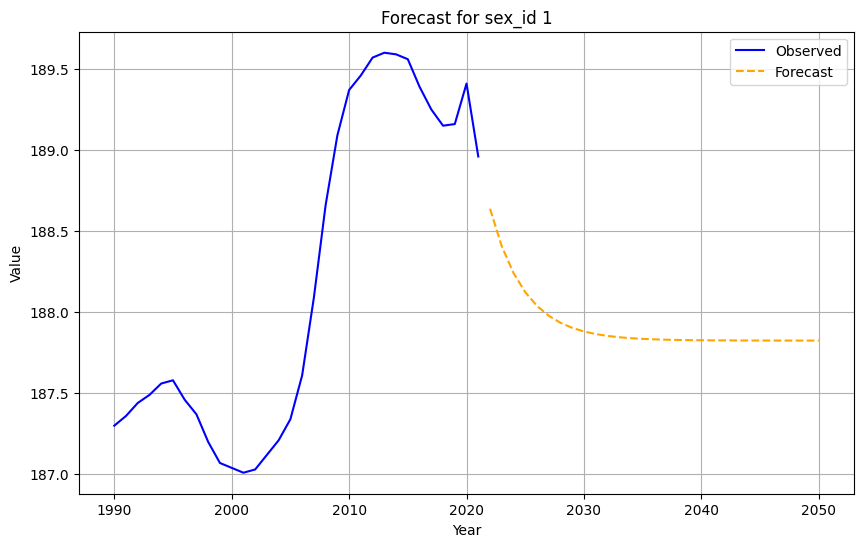

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-34.658, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-42.633, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-39.724, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35.570, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-41.443, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-41.364, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-40.120, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-44.228, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-43.275, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-43.210, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-40.872, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-41.932, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.508 seconds
                               SARIMAX 

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


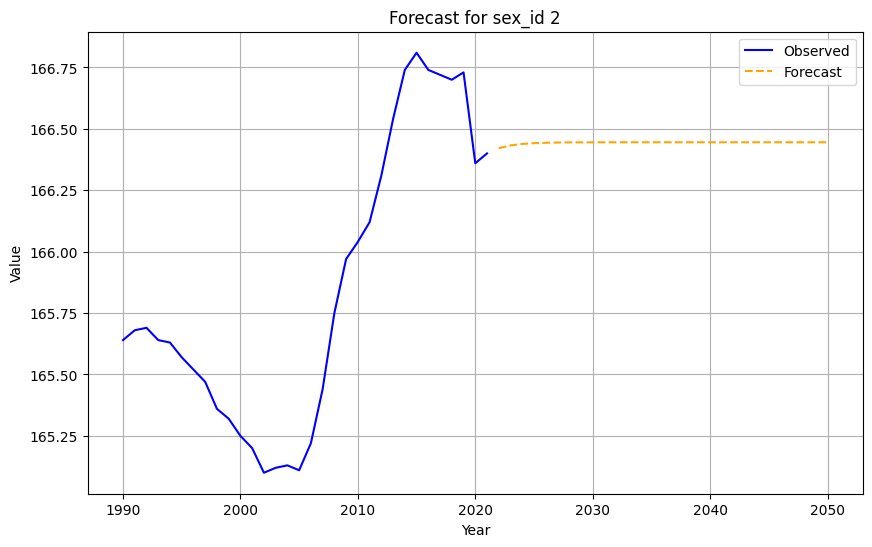

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-64.589, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-28.818, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-63.508, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-53.893, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28.820, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-66.612, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-62.728, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-67.274, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-65.995, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-67.534, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-66.307, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-64.395, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-69.436, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-65.497, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-68.2

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


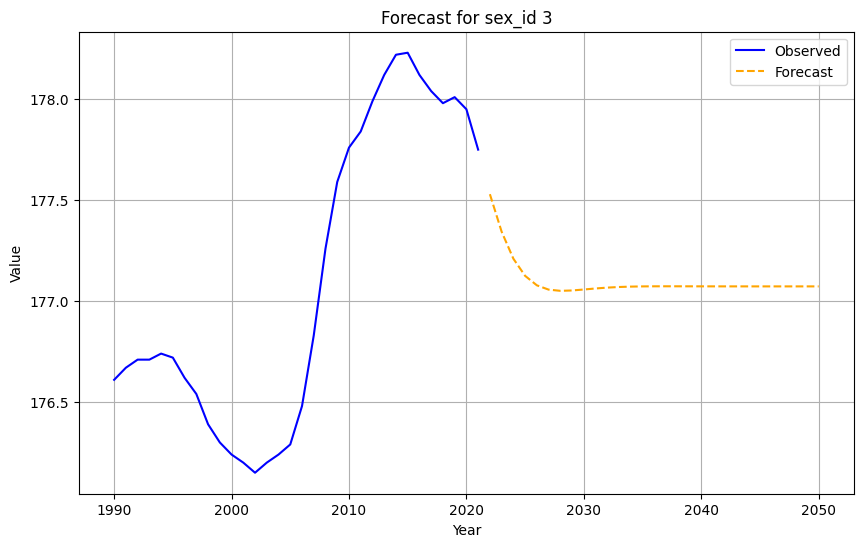

Forecast saved to 'new_data_important/forecast_1990_2050_autoarima.csv'.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Initialize a dictionary to store forecasts
forecasts = {}

# Loop through each sex_id
for sex_id in df['sex_id'].unique():
    # Filter data for the current sex_id
    # Filter data for the current sex_id
    sex_data = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_data = sex_data.sort_values(by='year')
    sex_data = sex_data.set_index('year')

    # Use auto_arima to find the best ARIMA model
    lmao = sex_data['val']
    model = auto_arima(lmao, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(model.summary())

    # Forecast up to 2050
    forecast_years = range(sex_data.index.max() + 1, 2051)
    forecast = model.predict(n_periods=len(forecast_years))

    # Store the forecast
    forecasts[sex_id] = pd.Series(forecast, index=forecast_years)

    # Plot the original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(sex_data.index, sex_data['val'], label='Observed', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='orange', linestyle='--')
    plt.title(f'Forecast for sex_id {sex_id}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine forecasts into a DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df.index.name = 'year'

# Save the forecast to a CSV file
forecast_df.to_csv('new_data_important/forecast_1990_2050_autoarima.csv')
print("Forecast saved to 'new_data_important/forecast_1990_2050_autoarima.csv'.")

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No s

sex_df.index.max() =  2021
2022    7.973278e+06
2023    8.075744e+06
2024    8.178185e+06
2025    8.280601e+06
2026    8.382990e+06
Name: predicted_mean, dtype: float64


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviromen

sex_df.index.max() =  2021
2022    7.037685e+06
2023    7.129539e+06
2024    7.221386e+06
2025    7.313226e+06
2026    7.405059e+06
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    1.501110e+07
2023    1.520556e+07
2024    1.539998e+07
2025    1.559436e+07
2026    1.578870e+07
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    188.637748
2023    188.406979
2024    188.241722
2025    188.123379
2026    188.038631
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    166.421255
2023    166.432550
2024    166.438551
2025    166.441740
2026    166.443435
Name: predicted_mean, dtype: float64
sex_df.index.max() =  2021
2022    177.579734
2023    177.434782
2024    177.311380
2025    177.206324
2026    177.116887
Name: predicted_mean, dtype: float64


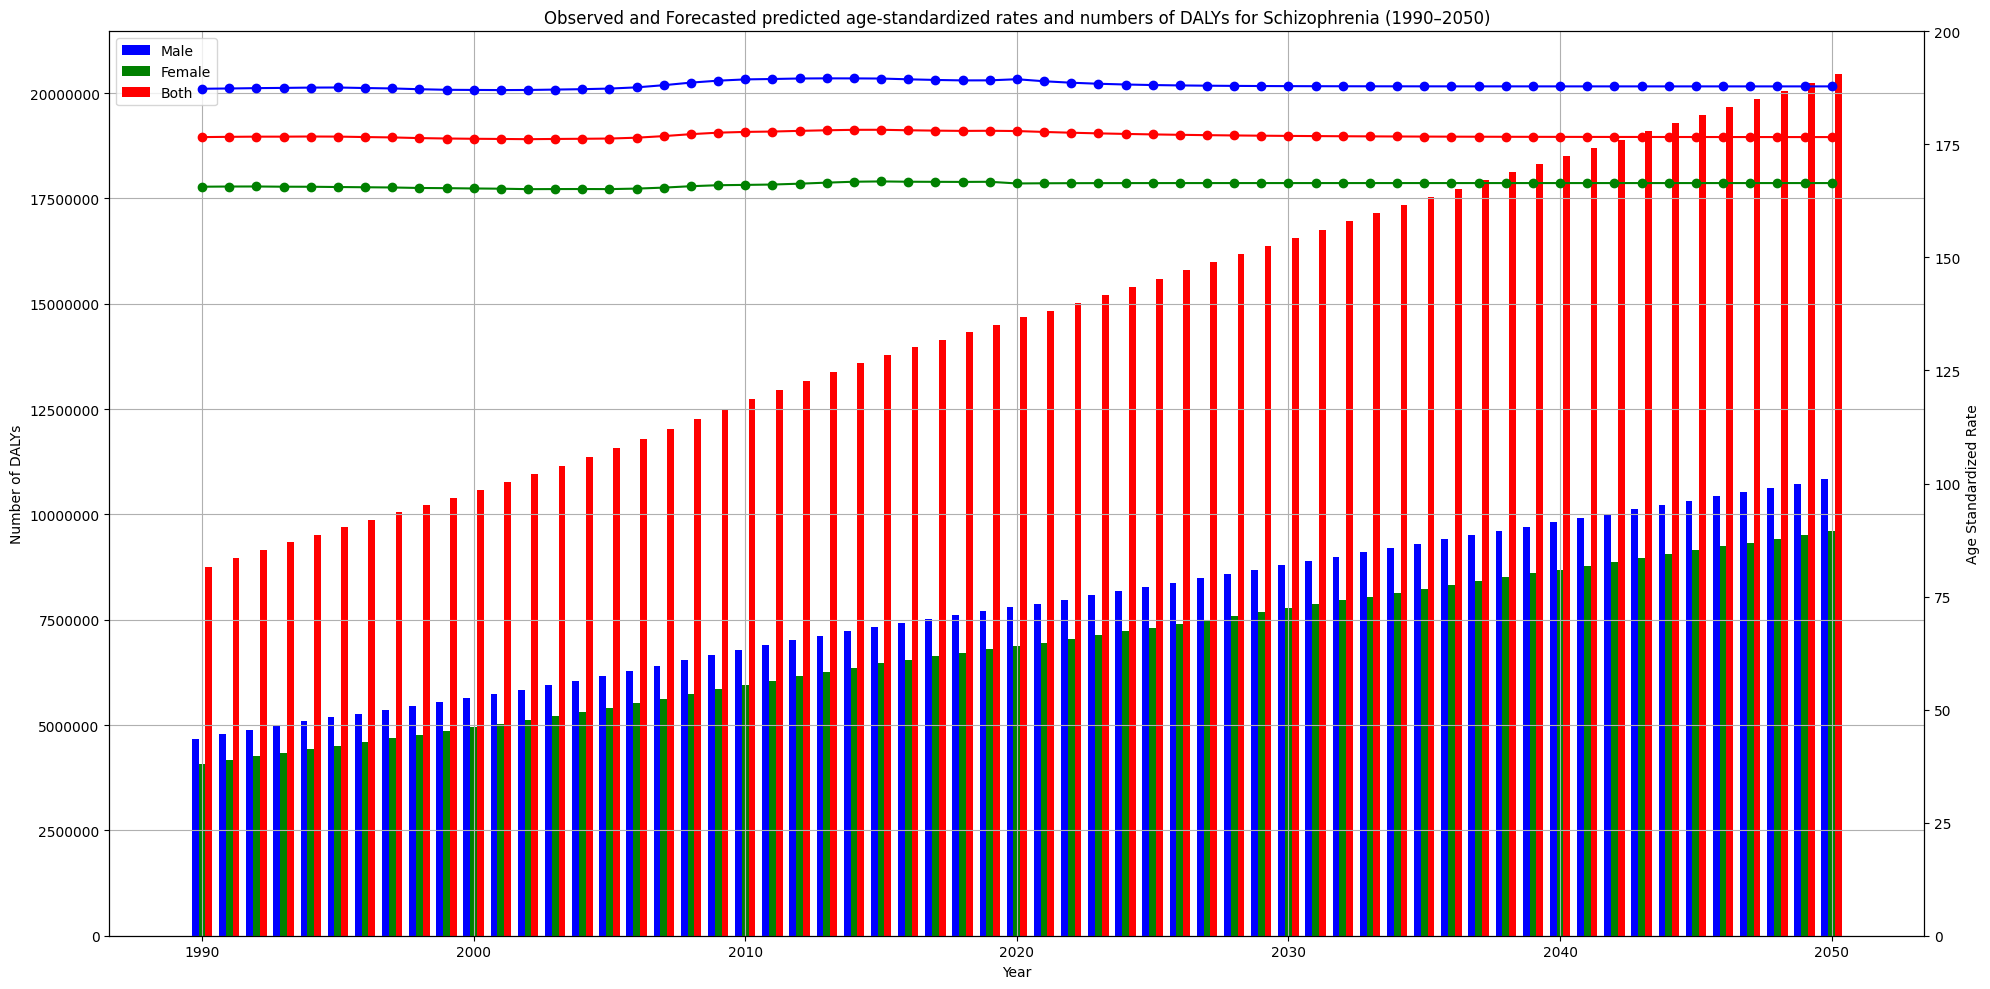

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Full year range
all_years = list(range(1990, 2051))

# Store observed and forecasted data
full_data_bar = {}
full_data_line = {}

# Define colors and label mapping
sex_ids = sorted(df['sex_id'].unique())  # e.g., [1, 2, 3]
colors = ['blue', 'green', 'red']
sex_labels = {1: 'Male', 2: 'Female', 3: 'Both'}

# Number of DALYs
for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    print("sex_df.index.max() = ", sex_df.index.max())
    forecast = model_fit.forecast(steps=len(forecast_years))
    forecast.index = forecast_years

    print(forecast.head())
    # Merge observed and forecast
    forecast_series = pd.Series(forecast, index=forecast_years)
    full_series = sex_df['val'].reindex(all_years[:len(sex_df.index)])
    full_series = pd.concat([full_series, forecast_series])
    full_data_bar[sex_id] = full_series



file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]


# Age-standardized rates
for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 0))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    print("sex_df.index.max() = ", sex_df.index.max())
    forecast = model_fit.forecast(steps=len(forecast_years))
    forecast.index = forecast_years

    print(forecast.head())
    # Merge observed and forecast
    forecast_series = pd.Series(forecast, index=forecast_years)
    full_series = sex_df['val'].reindex(all_years[:len(sex_df.index)])
    full_series = pd.concat([full_series, forecast_series])
    full_data_line[sex_id] = full_series


# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.25
years = np.array(all_years)

for i, sex_id in enumerate(sex_ids):
    data = full_data_bar[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax.bar(years + offset, data.values, width=bar_width, label=label, color=colors[i % len(colors)])

ax2 = ax.twinx()  # Create a second y-axis for the line plot
for i, sex_id in enumerate(sex_ids):
    data = full_data_line[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax2.plot(years, data.values, label=label, color=colors[i % len(colors)])
    ax2.scatter(years, data.values, color=colors[i % len(colors)])



ax.set_title('Observed and Forecasted predicted age-standardized rates and numbers of DALYs for Schizophrenia (1990–2050)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of DALYs')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
ax2.set_ylim(0, 200) # Set y-axis limits for the line plot
ax2.set_ylabel('Age Standardized Rate')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

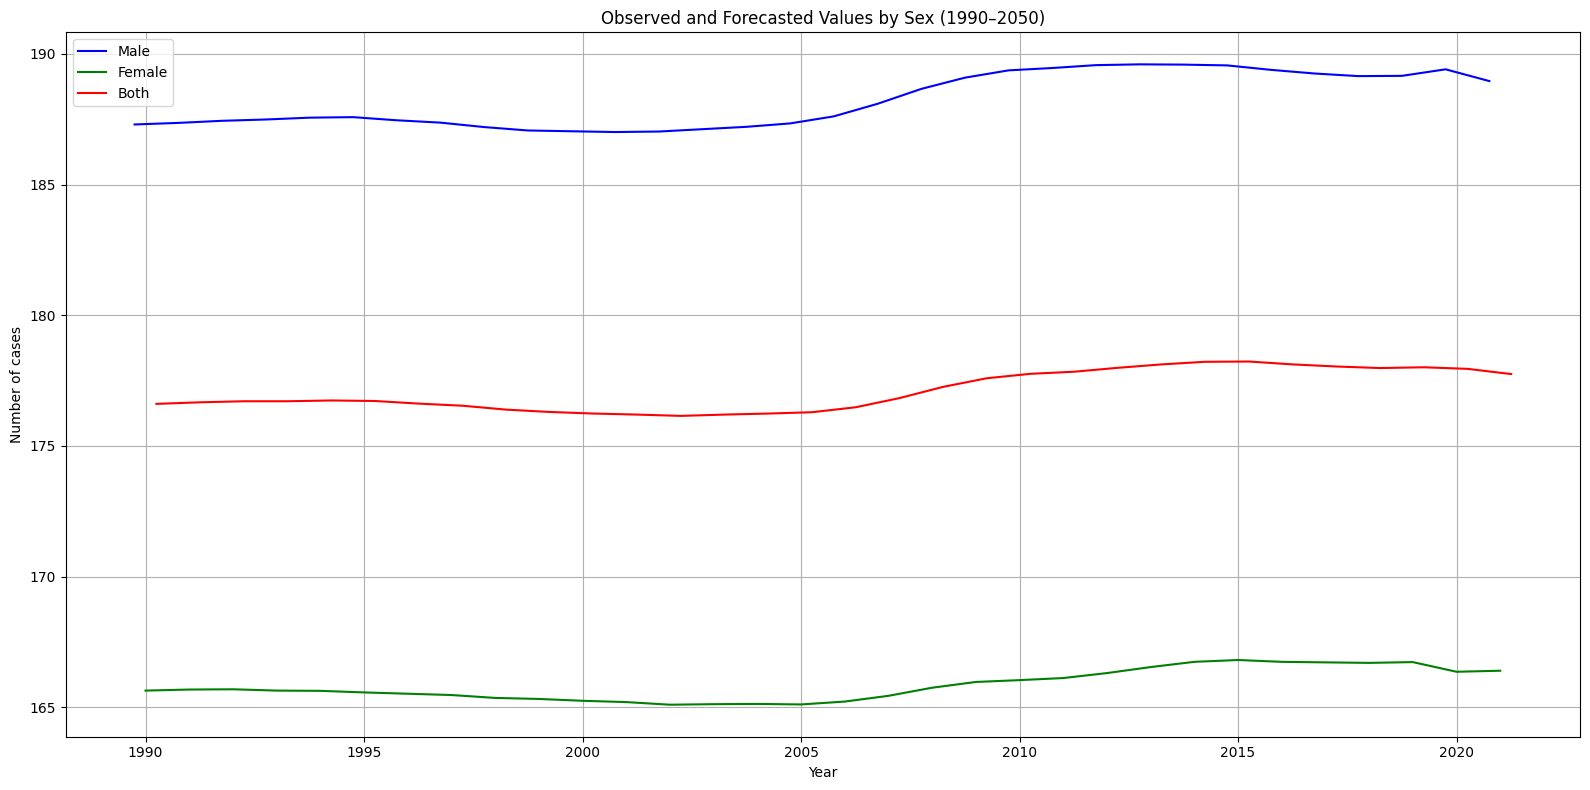

In [42]:

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Full year range
all_years = list(range(1990, 2051))

# Store observed and forecasted data
full_data = {}

# Define colors and label mapping
sex_ids = sorted(df['sex_id'].unique())  # e.g., [1, 2, 3]
colors = ['blue', 'green', 'red']
sex_labels = {1: 'Male', 2: 'Female', 3: 'Both'}

for i, sex_id in enumerate(sex_ids):
    sex_df = df[df['sex_id'] == sex_id][['year', 'val']].dropna()
    sex_df = sex_df.sort_values(by='year').set_index('year')

    # Fit ARIMA
    model = ARIMA(sex_df['val'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast to 2050
    forecast_years = range(sex_df.index.max() + 1, 2051)
    forecast = model_fit.forecast(steps=len(forecast_years))

    # Merge observed and forecast
    full_series = sex_df['val'].reindex(all_years)
    full_series.update(pd.Series(forecast, index=forecast_years))

    full_data[sex_id] = full_series

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(16, 8))
bar_width = 0.25
years = np.array(all_years)

for i, sex_id in enumerate(sex_ids):
    data = full_data[sex_id]
    offset = (i - len(sex_ids)/2 + 0.5) * bar_width  # Center the bars
    label = sex_labels.get(sex_id, f'Sex ID {sex_id}')
    ax.plot(years + offset, data.values, label=label, color=colors[i % len(colors)])

ax.set_title('Observed and Forecasted Values by Sex (1990–2050)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of cases')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
